In [1]:
from IPython.display import display
from api_key import ALPHA_API_KEY
import pandas_datareader

import pycaret.regression as pr
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'api_key'

## speed prediction for daily lows percent change: one day out

In [2]:
tickers = ['AAPL']
lookback=200
metric = 'low'
pc_metric = f'{metric}_percent_change'
target_name = f'{pc_metric}_target'
def format_dates(daily_stocks_data):
    df = daily_stocks_data.copy() 
    df['date']=df.index
    df.reset_index(inplace=True, drop=True)
    return df
def add_percent_change(daily_stocks_data, metric):
    percents = list()
    for index, row in daily_stocks_data.iterrows():
        old = row[metric]
        try:
            new = daily_stocks_data.iloc[index + 1][metric]
        except Exception as e:
            percents.append(np.nan) ## no next value, so this is undefined
            continue
        percents.append((new-old)/new)
    cp_df = daily_stocks_data.copy()
    cp_df[f'{metric}_percent_change']=percents
    return cp_df
def to_ts_df(daily_stocks_data, lookback, metric):
    ## column names
    columns = list()
    for i in range(lookback):
        columns.append(f'{metric}_{i}')
    columns.append(f'{metric}_target')
    df = pd.DataFrame(columns=columns)
    ## columns
    data = daily_stocks_data[metric].to_numpy()
    for index, col in enumerate(df.columns):
        df[col] = data[index:len(data)-lookback+index]
    ## dates index
    dates = daily_stocks_data.date.to_numpy()[:-lookback]
    df.insert(0, 'dates', dates)
    return df

,open,high,low,close,volume,date,low_percent_change
0,18.87,19.560,18.19,19.56,7916600,2001-03-13,0.013557
1,18.50,20.500,18.44,20.44,8531700,2001-03-14,0.063484
2,20.87,21.370,19.69,19.69,9452100,2001-03-15,-0.043455
3,19.00,20.310,18.87,19.62,8398500,2001-03-16,0.032308
4,19.75,20.620,19.50,20.56,6357300,2001-03-19,0.009650
...,...,...,...,...,...,...,...
5023,128.41,128.720,125.01,125.12,102260945,2021-03-02,-0.026018
5024,124.81,125.710,121.84,122.06,112966340,2021-03-03,-0.027146
5025,121.75,123.600,118.62,120.13,178154975,2021-03-04,-0.008931
5026,120.98,121.935,117.57,121.42,153766601,2021-03-05,-0.011703


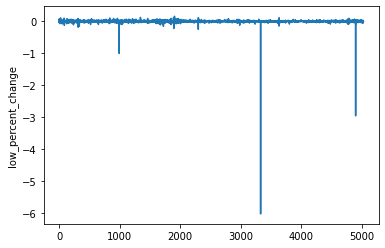

,dates,low_percent_change_0,low_percent_change_1,low_percent_change_2,low_percent_change_3,low_percent_change_4,low_percent_change_5,low_percent_change_6,low_percent_change_7,low_percent_change_8,low_percent_change_9,low_percent_change_10,low_percent_change_11,low_percent_change_12,low_percent_change_13,low_percent_change_14,low_percent_change_15,low_percent_change_16,low_percent_change_17,low_percent_change_18,low_percent_change_19,low_percent_change_20,low_percent_change_21,low_percent_change_22,low_percent_change_23,low_percent_change_24,low_percent_change_25,low_percent_change_26,low_percent_change_27,low_percent_change_28,low_percent_change_29,low_percent_change_30,low_percent_change_31,low_percent_change_32,low_percent_change_33,low_percent_change_34,low_percent_change_35,low_percent_change_36,low_percent_change_37,low_percent_change_38,low_percent_change_39,low_percent_change_40,low_percent_change_41,low_percent_change_42,low_percent_change_43,low_percent_change_44,low_percent_change_45,low_percent_change_46,low_percent_change_47,low_percent_change_48,low_percent_change_49,low_percent_change_50,low_percent_change_51,low_percent_change_52,low_percent_change_53,low_percent_change_54,low_percent_change_55,low_percent_change_56,low_percent_change_57,low_percent_change_58,low_percent_change_59,low_percent_change_60,low_percent_change_61,low_percent_change_62,low_percent_change_63,low_percent_change_64,low_percent_change_65,low_percent_change_66,low_percent_change_67,low_percent_change_68,low_percent_change_69,low_percent_change_70,low_percent_change_71,low_percent_change_72,low_percent_change_73,low_percent_change_74,low_percent_change_75,low_percent_change_76,low_percent_change_77,low_percent_change_78,low_percent_change_79,low_percent_change_80,low_percent_change_81,low_percent_change_82,low_percent_change_83,low_percent_change_84,low_percent_change_85,low_percent_change_86,low_percent_change_87,low_percent_change_88,low_percent_change_89,low_percent_change_90,low_percent_change_91,low_percent_change_92,low_percent_change_93,low_percent_change_94,low_percent_change_95,low_percent_change_96,low_percent_change_97,low_percent_change_98,low_percent_change_99,low_percent_change_100,low_percent_change_101,low_percent_change_102,low_percent_change_103,low_percent_change_104,low_percent_change_105,low_percent_change_106,low_percent_change_107,low_percent_change_108,low_percent_change_109,low_percent_change_110,low_percent_change_111,low_percent_change_112,low_percent_change_113,low_percent_change_114,low_percent_change_115,low_percent_change_116,low_percent_change_117,low_percent_change_118,low_percent_change_119,low_percent_change_120,low_percent_change_121,low_percent_change_122,low_percent_change_123,low_percent_change_124,low_percent_change_125,low_percent_change_126,low_percent_change_127,low_percent_change_128,low_percent_change_129,low_percent_change_130,low_percent_change_131,low_percent_change_132,low_percent_change_133,low_percent_change_134,low_percent_change_135,low_percent_change_136,low_percent_change_137,low_percent_change_138,low_percent_change_139,low_percent_change_140,low_percent_change_141,low_percent_change_142,low_percent_change_143,low_percent_change_144,low_percent_change_145,low_percent_change_146,low_percent_change_147,low_percent_change_148,low_percent_change_149,low_percent_change_150,low_percent_change_151,low_percent_change_152,low_percent_change_153,low_percent_change_154,low_percent_change_155,low_percent_change_156,low_percent_change_157,low_percent_change_158,low_percent_change_159,low_percent_change_160,low_percent_change_161,low_percent_change_162,low_percent_change_163,low_percent_change_164,low_percent_change_165,low_percent_change_166,low_percent_change_167,low_percent_change_168,low_percent_change_169,low_percent_change_170,low_percent_change_171,low_percent_change_172,low_percent_change_173,low_percent_change_174,low_percent_change_175,low_percent_change_176,low_percent_change_177,low_perce

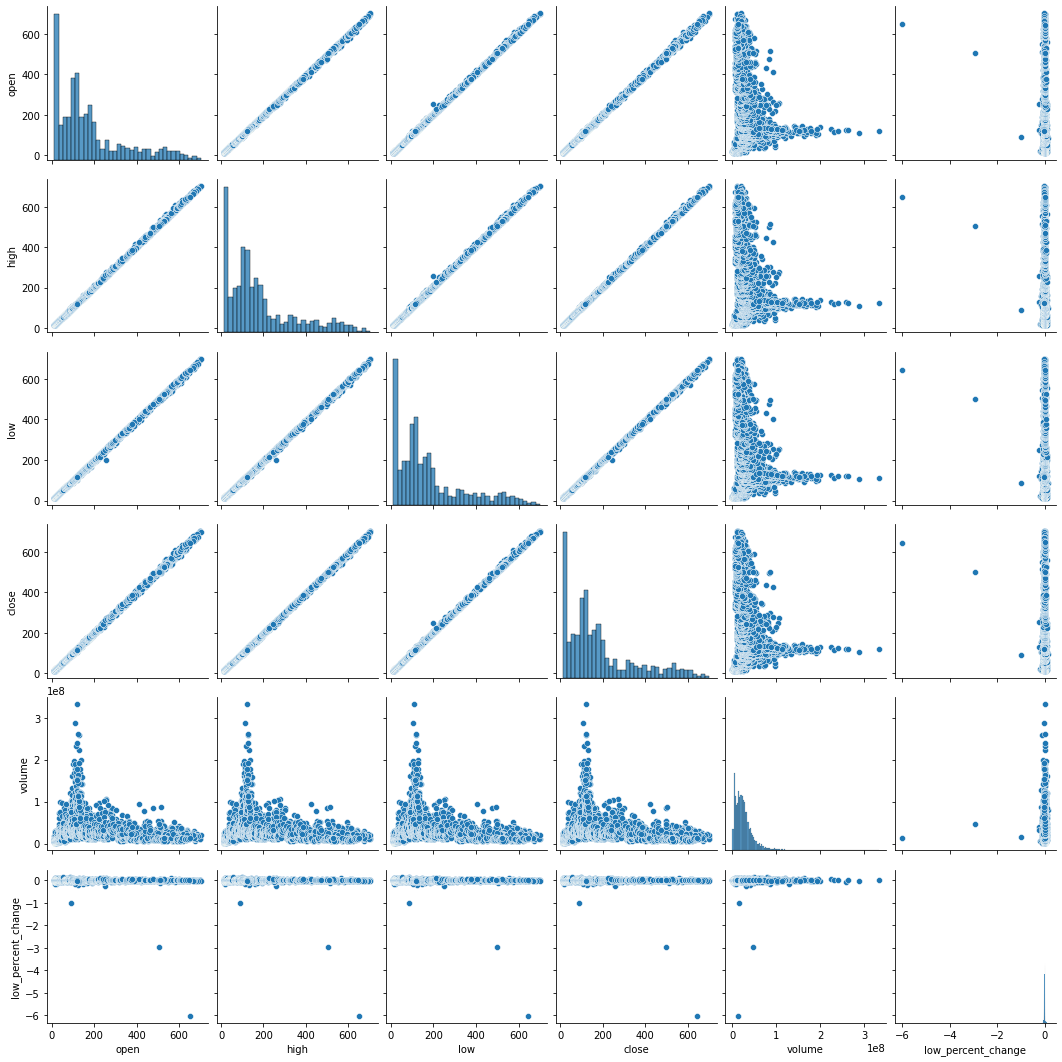

In [3]:
daily_stocks_data_raw = pandas_datareader.av.time_series.AVTimeSeriesReader(symbols=tickers, api_key=ALPHA_API_KEY, function='TIME_SERIES_DAILY').read()
daily_stocks_data = format_dates(daily_stocks_data_raw) 
daily_stocks_data = add_percent_change(daily_stocks_data, metric)
display(daily_stocks_data)
sns.lineplot(data=daily_stocks_data[pc_metric])
plt.show()
ts_df = to_ts_df(daily_stocks_data, lookback, pc_metric)
display(ts_df)
sns.pairplot(daily_stocks_data)
plt.show()

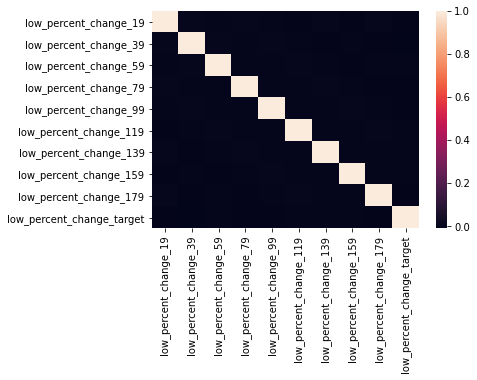

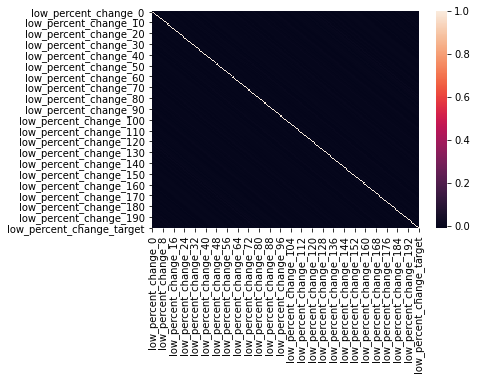

In [4]:
# indecies = [*[x for x in range(0,lookback, lookback//10)], lookback+1]
# ts_len = len(ts_df.index)
# row_indecies = [*[x for x in range(0,ts_len, ts_len//200)]]
# sns.pairplot(ts_df.iloc[row_indecies, indecies]) ## takes a while for many data points
# plt.show()
heat_indecies = [*[x for x in range(0,lookback, lookback//10)], lookback+1]
corr_mat = ts_df.iloc[:,heat_indecies].corr()
corr_mat_all = ts_df.corr()
sns.heatmap(corr_mat)
plt.show()
sns.heatmap(corr_mat_all)
plt.show()

In [5]:
su = pr.setup(ts_df, target=target_name, ignore_features=['dates'], normalize=True, log_experiment=True, experiment_name='percent_change_low_pycaret', log_plots=True, log_profile=False, log_data=False)

,Description,Value
0,session_id,1117
1,Target,low_percent_change_target
2,Original Data,"(4828, 202)"
3,Missing Values,True
4,Numeric Features,200
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3378, 200)"


In [6]:
best = pr.compare_models(n_select=3, sort='MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,0.0167,0.0115,0.0560,-0.0119,0.0311,1.2296,0.1370
lasso,Lasso Regression,0.0167,0.0115,0.0560,-0.0110,0.0311,1.2321,0.0460
en,Elastic Net,0.0167,0.0115,0.0560,-0.0110,0.0311,1.2321,0.0250
llar,Lasso Least Angle Regression,0.0167,0.0115,0.0560,-0.0110,0.0311,1.2321,0.0440
ada,AdaBoost Regressor,0.0167,0.0115,0.0562,-0.0275,0.0304,1.4818,1.6560
huber,Huber Regressor,0.0183,0.0117,0.0593,-0.3492,0.0329,2.0241,0.2670
gbr,Gradient Boosting Regressor,0.0213,0.0187,0.1002,-13.5770,0.0531,2.0723,6.3140
et,Extra Trees Regressor,0.0193,0.0119,0.0626,-0.7728,0.0343,2.2930,8.1120
rf,Random Forest Regressor,0.0210,0.0144,0.0865,-6.0242,0.0499,2.3408,35.1530
lightgbm,Light Gradient Boosting Machine,0.0189,0.0117,0.0597,-0.3968,0.0308,2.5185,1.3990


In [7]:
best_tuned = [pr.tune_model(model, optimize='MAPE', n_iter=10 ) for model in best]


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0143,0.0005,0.0231,-0.0006,0.0222,1.0000
1,0.0150,0.0005,0.0223,-0.0119,0.0217,1.0000
2,0.0142,0.0004,0.0198,-0.0021,0.0195,1.0000
3,0.0144,0.0004,0.0205,-0.0011,0.0200,1.0000
4,0.0328,0.1079,0.3285,-0.0023,0.1085,1.0000
5,0.0143,0.0004,0.0201,-0.0038,0.0197,1.0000
6,0.0139,0.0004,0.0205,-0.0016,0.0200,1.0000
7,0.0172,0.0036,0.0597,-0.0025,0.0441,1.0000
8,0.0156,0.0006,0.0251,-0.0019,0.0241,1.0000
9,0.0134,0.0004,0.0192,-0.0034,0.0188,1.0000


In [8]:
pr.save_model(best_tuned[0], 'lasso_norm_percent_change')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['dates'], id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='low_percent_change_target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numeri...
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  BayesianRidge(

In [9]:
# plot_types = ['residuals','error', 'cooks', 'rfe', 'learning', 'vc', 'manifold', 'feature', 'parameter']
# for best_m in best_tuned:
#     for plot_type in plot_types:
#         try:
#             pr.plot_model(best_m, plot=plot_type, save=True)
#         except:
#             pass

In [10]:
predictions = [pr.predict_model(best_m) for best_m in best_tuned]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.0180,0.0066,0.0814,-0.0311,0.0422,1.5194


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.0164,0.0064,0.0802,-0.0002,0.0412,1.0000


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Elastic Net,0.0164,0.0064,0.0802,-0.0002,0.0412,1.0000


In [11]:
for prediction in predictions:
    display(prediction.Label.any()!=0)

True

False

False

In [12]:
predictions[0]

,low_percent_change_0,low_percent_change_1,low_percent_change_2,low_percent_change_3,low_percent_change_4,low_percent_change_5,low_percent_change_6,low_percent_change_7,low_percent_change_8,low_percent_change_9,...,low_percent_change_192,low_percent_change_193,low_percent_change_194,low_percent_change_195,low_percent_change_196,low_percent_change_197,low_percent_change_198,low_percent_change_199,low_percent_change_target,Label
0,0.422866,-0.287796,-0.204174,-0.091830,-0.224731,0.093015,1.010041,0.217519,0.037905,-0.568853,...,0.227665,-0.304447,0.097193,-0.222457,0.415338,0.249364,-0.018049,1.167390,0.026870,-0.004713
1,-0.577565,-0.138400,0.374334,0.119059,-0.324763,-0.123803,-2.354034,0.002583,-0.086168,-1.071612,...,0.091070,-0.411852,0.030811,-0.147644,0.083254,0.739018,-0.011400,0.945028,0.004606,0.000723
2,2.157546,0.863869,0.044475,-0.028750,0.109300,-0.035941,0.173313,0.106584,0.015205,0.130039,...,0.052257,-0.045805,-0.053204,0.196056,0.283012,-0.313352,0.081759,-0.011992,0.013861,-0.000989
3,1.079629,-0.843635,0.189095,0.112285,-0.013831,0.154892,-0.795919,-0.549548,-0.007344,-1.860133,...,-0.098799,0.165457,0.015784,0.525592,-0.047259,0.306015,0.121261,0.340255,-0.020096,0.002798
4,-0.351160,-0.026684,0.144506,0.186880,0.238252,0.016354,0.334770,0.050330,0.073757,-0.145133,...,-0.274843,-0.127411,0.047841,-0.509548,-0.081943,0.712093,0.172964,0.359820,0.017585,0.001927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,-1.140810,0.120986,0.269351,-0.151343,0.105141,-0.058115,-1.586744,-0.125355,0.373892,1.389864,...,0.091057,-0.294773,0.191934,-0.038413,0.096136,-0.616775,-0.075922,-0.051535,0.009859,-0.005867
1445,0.746765,0.366145,0.164100,0.080371,0.225535,-0.054390,-0.011517,0.122051,0.157013,-0.151113,...,-0.179174,-0.179368,-0.196688,0.160949,0.256361,0.762765,0.039282,-0.441115,-0.006461,-0.000710
1446,-2.342117,0.002368,0.030348,0.267271,0.240794,0.014728,-0.192177,0.185645,0.065895,0.155606,...,0.133687,0.327545,0.111484,-0.013387,0.053496,-0.048583,-0.081486,0.054691,-0.021147,0.001503
1447,0.354274,0.662619,0.059235,-0.015263,0.030696,-0.117437,0.056876,0.057495,-0.024894,-0.098791,...,-0.110673,0.575994,0.204622,0.157601,0.090192,0.202596,0.106894,-0.001094,-0.006442,0.000309


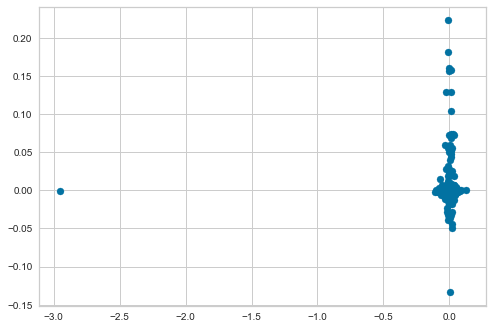

In [20]:
plt.scatter(predictions[2].low_percent_change_target, predictions[0].Label)

- For predicting percent changes on GSIT, the best preforming traditional methods simply predict no change and acheive a mean absolute percent error of 100% (that is to say that it is on average plus or minus the actual value; this leads me to believe that the stock is statistically indistiguishable from random noise at this data level. I will try for another stock. 
- Same for AAPL, though Bayseian ridge did change a little, yet it didn't improve upon 100% MPAE;
- Time for NNs?
- Time for new data?
- Time for a new task?
- Maybe the data is on too small a scale to fit?
- Trying with normalization:

In [14]:
# def to_timeseries(daily_stocks_data, lookback, metric):
#     lows = daily_stocks_data[metric].tolist()
#     x,y = list(), list()
#     for index in range(lookback, len(lows)):
#         xi = [x for x in lows[index-lookback:index]]
#         yi = lows[index]
#         x.append(xi)
#         y.append(yi)
#     return x,y
# # x, y = to_timeseries(daily_stocks_data, lookback, metric)

In [15]:
# from gplearn.genetic import SymbolicRegressor
# symreg = SymbolicRegressor(generations = 50)
# sc = pr.create_model(symreg)

In [16]:
# et = pr.create_model('et')
# et_tuned = pr.tune_model(et, optimize='MSE', n_iter=50)
# """
# 	MAE	MSE	RMSE	R2	RMSLE	MAPE
# 0	0.2126	0.0904	0.3007	0.9731	0.0442	0.0393
# 1	0.2404	0.1134	0.3367	0.9613	0.0479	0.0426
# 2	0.2153	0.0983	0.3135	0.9615	0.0442	0.0383
# 3	0.2316	0.0989	0.3145	0.9614	0.0450	0.0397
# 4	0.2213	0.0886	0.2977	0.9704	0.0450	0.0411
# 5	0.2398	0.1124	0.3353	0.9591	0.0491	0.0432
# 6	0.2017	0.0835	0.2890	0.9705	0.0407	0.0351
# 7	0.2303	0.1200	0.3463	0.9567	0.0494	0.0409
# 8	0.2200	0.0977	0.3125	0.9686	0.0445	0.0402
# 9	0.2378	0.1157	0.3402	0.9596	0.0475	0.0416
# Mean	0.2251	0.1019	0.3186	0.9642	0.0457	0.0402
# SD	0.0123	0.0120	0.0189	0.0055	0.0026	0.0022

# """

In [17]:
# lightgbm = pr.create_model('lightgbm')
# lightgbm_tuned = pr.tune_model(lightgbm, optimize='MSE', n_iter=50)
# """
# MAE	MSE	RMSE	R2	RMSLE	MAPE
# 0	0.2319	0.1037	0.3221	0.9691	0.0488	0.0439
# 1	0.2493	0.1168	0.3418	0.9601	0.0511	0.0459
# 2	0.2440	0.1180	0.3435	0.9537	0.0499	0.0440
# 3	0.2319	0.0962	0.3102	0.9625	0.0446	0.0402
# 4	0.2422	0.1005	0.3171	0.9664	0.0500	0.0463
# 5	0.2513	0.1177	0.3431	0.9572	0.0512	0.0460
# 6	0.2134	0.0919	0.3032	0.9676	0.0426	0.0374
# 7	0.2505	0.1297	0.3601	0.9532	0.0520	0.0448
# 8	0.2428	0.1182	0.3437	0.9620	0.0500	0.0450
# 9	0.2373	0.1072	0.3274	0.9625	0.0475	0.0433
# Mean	0.2395	0.1100	0.3312	0.9614	0.0488	0.0437
# SD	0.0109	0.0113	0.0171	0.0052	0.0029	0.0027

# """

In [18]:
# xgboost = pr.create_model('xgboost')
# xgboost_tuned = pr.tune_model(xgboost, optimize='MSE', n_iter=50)
# """
# 	MAE	MSE	RMSE	R2	RMSLE	MAPE
# 0	0.1672	0.0527	0.2295	0.9843	0.0350	0.0316
# 1	0.1896	0.0717	0.2678	0.9755	0.0376	0.0331
# 2	0.1641	0.0551	0.2346	0.9784	0.0350	0.0304
# 3	0.1716	0.0487	0.2207	0.9810	0.0310	0.0293
# 4	0.1605	0.0483	0.2198	0.9838	0.0346	0.0303
# 5	0.1842	0.0646	0.2542	0.9765	0.0381	0.0338
# 6	0.1440	0.0378	0.1943	0.9867	0.0283	0.0258
# 7	0.1876	0.0777	0.2788	0.9720	0.0398	0.0330
# 8	0.1787	0.0696	0.2639	0.9776	0.0380	0.0326
# 9	0.1840	0.0647	0.2543	0.9774	0.0365	0.0326
# Mean	0.1731	0.0591	0.2418	0.9793	0.0354	0.0313
# SD	0.0137	0.0119	0.0250	0.0043	0.0033	0.0023

# """